## spaCy Course Ch 2: Large-scale data analysis with spaCy

In this chapter, you'll use your new skills to extract specific information from large volumes of text. You''ll learn how to make the most of spaCy's data structures, and how to effectively combine statistical and rule-based approaches for text analysis.

https://course.spacy.io/en/chapter2

1. Data Structures (1): Vocab, Lexemes and StringStore

Shared vocab and string store (1)

- Vocab: stores data shared across multiple documents
- To save memory, spaCy encodes all strings to hash values
- Strings are only stored once in the StringStore via nlp.vocab.strings
- String store: lookup table in both directions

In [4]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# coffee_hash = nlp.vocab.strings["coffee"]
# coffee_string = nlp.vocab.strings[coffee_hash]

- Hashes can't be reversed – that's why we need to provide the shared vocab

In [5]:
# Raises an error if we haven't seen the string before
# string = nlp.vocab.strings[3197928453018144401]

Shared vocab and string store (2)

- Look up the string and hash in nlp.vocab.strings

In [6]:
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


In [29]:
# doc?

- The doc also exposes the vocab and strings

In [7]:
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


Lexemes: entries in the vocabulary

- A Lexeme object is an entry in the vocabulary

In [6]:
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


- Contains the context-independent information about a word
    - Word text: lexeme.text and lexeme.orth (the hash)
    - Lexical attributes like lexeme.is_alpha
    - Not context-dependent part-of-speech tags, dependencies or entity labels

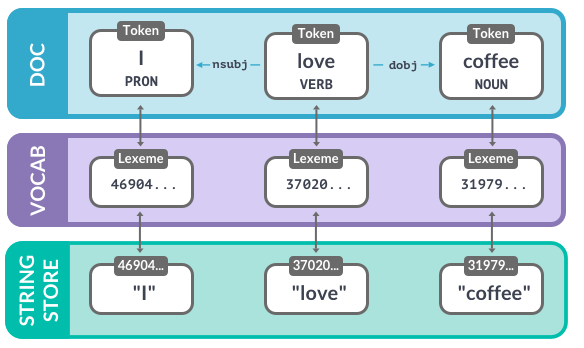

In [9]:
from IPython.display import Image
Image("vocab_stringstore.png")

2. Strings to hashes

Part 1

- Look up the string “cat” in nlp.vocab.strings to get the hash.
- Look up the hash to get back the string.

In [12]:
from spacy.lang.en import English

nlp = English()
doc = nlp("I have a cat")

# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings['cat']
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[cat_hash]
print(cat_string)

5439657043933447811
cat


Part 2

- Look up the string label “PERSON” in nlp.vocab.strings to get the hash.
- Look up the hash to get back the string.

In [13]:
from spacy.lang.en import English

nlp = English()
doc = nlp("David Bowie is a PERSON")

# Look up the hash for the string label "PERSON"
person_hash = nlp.vocab.strings['PERSON']
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[person_hash]
print(person_string)

380
PERSON


3. Vocab, hashes and lexemes (Quiz)

Why does this code throw an error?

In [14]:
from spacy.lang.en import English
from spacy.lang.de import German

# Create an English and German nlp object
nlp = English()
nlp_de = German()

# Get the ID for the string 'Bowie'
bowie_id = nlp.vocab.strings["Bowie"]
print(bowie_id)

# Look up the ID for "Bowie" in the vocab
print(nlp_de.vocab.strings[bowie_id])

2644858412616767388


KeyError: "[E018] Can't retrieve string for hash '2644858412616767388'. This usually refers to an issue with the `Vocab` or `StringStore`."

- The string "Bowie" isn’t in the German vocab, so the hash can’t be resolved in the string store.

That's correct! Hashes can’t be reversed. To prevent this problem, add the word to the new vocab by processing a text or looking up the string, or use the same vocab to resolve the hash back to a string.

4. Data Structures (2): Doc, Span and Token

The Doc object

In [15]:
# Create an nlp object
from spacy.lang.en import English
nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

In [19]:
# ?

doc

Hello world!

The Span object (1)

In [16]:
# IMG here

The Span object (2)

In [17]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

In [18]:
# ?

doc.ents

(Hello world,)

Best practices

- Doc and Span are very powerful and hold references and relationships of words and sentences
    - Convert result to strings as late as possible
    - Use token attributes if available – for example, token.i for the token index

- Don't forget to pass in the shared vocab

5. Creating a Doc

Let’s create some Doc objects from scratch!

Part 1

- Import the Doc from spacy.tokens.
- Create a Doc from the words and spaces. Don’t forget to pass in the vocab!

In [20]:
from spacy.lang.en import English

nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ["spaCy", "is", "cool", "!"]
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!


Part 2

- Import the Doc from spacy.tokens.
- Create a Doc from the words and spaces. Don’t forget to pass in the vocab!

In [25]:
from spacy.lang.en import English

nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Go, get started!"
words = ["Go", ",", "get", "started", "!"]
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


Part 3

- Import the Doc from spacy.tokens.
- Complete the words and spaces to match the desired text and create a doc.

In [30]:
from spacy.lang.en import English

nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Oh, really?!"
words = ['Oh', ',', 'really', '?', '!']
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Oh, really?!


6. Docs, spans and entities from scratch

In this exercise, you’ll create the Doc and Span objects manually, and update the named entities – just like spaCy does behind the scenes. A shared nlp object has already been created.

- Import the Doc and Span classes from spacy.tokens.
- Use the Doc class directly to create a doc from the words and spaces.
- Create a Span for “David Bowie” from the doc and assign it the label "PERSON".
- Overwrite the doc.ents with a list of one entity, the “David Bowie” span.

In [32]:
from spacy.lang.en import English

nlp = English()

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label='PERSON')
print(span.text, span.label_)

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

I like David Bowie
David Bowie PERSON
[('David Bowie', 'PERSON')]


✔ Perfect! Creating spaCy's objects manually and modifying the entities
will come in handy later when you're writing your own information extraction
pipelines.

7. Data structures best practices (Quiz)

The code in this example is trying to analyze a text and collect all proper nouns that are followed by a verb.

In [35]:
import spacy

# nlp = spacy.load("en_core_web_md")
doc = nlp("Berlin is a nice city")

# Get all tokens and part-of-speech tags
token_texts = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == "PROPN":
        # Check if the next token is a verb
        if pos_tags[index + 1] == "VERB":
            result = token_texts[index]
            print("Found proper noun before a verb:", result)

Part 1

- Why is the code bad?

    - It only uses lists of strings instead of native token attributes. This is often less efficient, and can't express complex relationships.

That's correct! Always convert the results to strings as late as possible, and try to use native token attributes to keep things consistent.

Part 2

- Rewrite the code to use the native token attributes instead of lists of token_texts and pos_tags.
- Loop over each token in the doc and check the token.pos_ attribute.
- Use doc[token.i + 1] to check for the next token and its .pos_ attribute.
- If a proper noun before a verb is found, print its token.text.

In [40]:
import spacy

# nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin is a nice city")

# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

✔ Great work! While the solution here works fine for the given example,
there are still things that can be improved. If the doc ends with a proper noun,
doc[token.i + 1] will fail. To make sure the code generalizes, you should first
check if token.i + 1 < len(doc).

In [42]:
# ?

token.i + 1 < len(doc)

False

8. Word vectors and semantic similarity

Comparing semantic similarity

- spaCy can compare two objects and predict similarity
- Doc.similarity(), Span.similarity() and Token.similarity()
- Take another object and return a similarity score (0 to 1)
- Important: needs a model that has word vectors included, for example:
    - ✅ en_core_web_md (medium model)
    - ✅ en_core_web_lg (large model)
    - 🚫 NOT en_core_web_sm (small model)

Similarity examples (1)

In [43]:
# Load a larger model with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8627204117787385


In [46]:
# Note

# 'I like fast food' vs 'I like pizza'

In [44]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.7369546


In [45]:
# Note

# 'pizza' vs 'pasta'

Similarity examples (2)

In [47]:
# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

0.32531983166759537


In [50]:
# ?
# token = nlp("soap")[1]
# This returns an error

In [48]:
# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.6199092090831612


How does spaCy predict similarity?

- Similarity is determined using word vectors
- Multi-dimensional meaning representations of words
- Generated using an algorithm like [Word2Vec](https://en.wikipedia.org/wiki/Word2vec) and lots of text
- Can be added to spaCy's statistical models
- Default: cosine similarity, but can be adjusted
- Doc and Span vectors default to average of token vectors
- Short phrases are better than long documents with many irrelevant words

Word vectors in spaCy

In [52]:
# Load a larger model with vectors
nlp = spacy.load("en_core_web_md")

doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
# print(doc[3].vector)

 [2.02280000e-01,  -7.66180009e-02,   3.70319992e-01,
  3.28450017e-02,  -4.19569999e-01,   7.20689967e-02,
 -3.74760002e-01,   5.74599989e-02,  -1.24009997e-02,
  5.29489994e-01,  -5.23800015e-01,  -1.97710007e-01,
 -3.41470003e-01,   5.33169985e-01,  -2.53309999e-02,
  1.73800007e-01,   1.67720005e-01,   8.39839995e-01,
  5.51070012e-02,   1.05470002e-01,   3.78719985e-01,
  2.42750004e-01,   1.47449998e-02,   5.59509993e-01,
  1.25210002e-01,  -6.75960004e-01,   3.58420014e-01,
 -4.00279984e-02,   9.59490016e-02,  -5.06900012e-01,
 -8.53179991e-02,   1.79800004e-01,   3.38669986e-01,
  ...

In [53]:
# Output can't be suppressed in Jupyter Lab,
# so I'm leaving it as a comment

Similarity depends on the application context

- Useful for many applications: recommendation systems, flagging duplicates etc.
- There's no objective definition of "similarity"
- Depends on the context and what application needs to do

In [54]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9501447503553421


9. Inspecting word vectors

In this exercise, you’ll use a larger English model, which includes around 20.000 word vectors. The model is already pre-installed.

- Load the medium "en_core_web_md" model with word vectors.
- Print the vector for "bananas" using the token.vector attribute.

In [60]:
import spacy

# Load the en_core_web_md model
nlp = spacy.load("en_core_web_md")

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
# print(bananas_vector)

In [58]:
# Output can't be suppressed in Jupyter Lab,
# so I'm commenting it out

✔ Well done! In the next exercise, you'll be using spaCy to predict
similarities between documents, spans and tokens via the word vectors under the
hood.

10. Comparing similarities

In this exercise, you’ll be using spaCy’s similarity methods to compare Doc, Token and Span objects and get similarity scores.

Part 1

- Use the doc.similarity method to compare doc1 to doc2 and print the result.

In [61]:
import spacy

nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8789265574516525


Part 2

- Use the token.similarity method to compare token1 to token2 and print the result.

In [62]:
import spacy

nlp = spacy.load("en_core_web_md")

doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books"
similarity = token1.similarity(token2)
print(similarity)

0.22325331


Part 3

- Create spans for “great restaurant”/“really nice bar”.
- Use span.similarity to compare them and print the result.

In [68]:
import spacy

nlp = spacy.load("en_core_web_md")

doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[-4:-1]

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

0.75173926


In [67]:
# ?

doc[-3:-1], doc[-4:-1], doc[-1]

(nice bar, really nice bar, .)

✔ Well done! Feel free to experiment with comparing more objects, if
you like. The similarities are not *always* this conclusive. Once you're getting
serious about developing NLP applications that leverage semantic similarity, you
might want to train vectors on your own data, or tweak the similarity
algorithm.

11. Combining models and rules

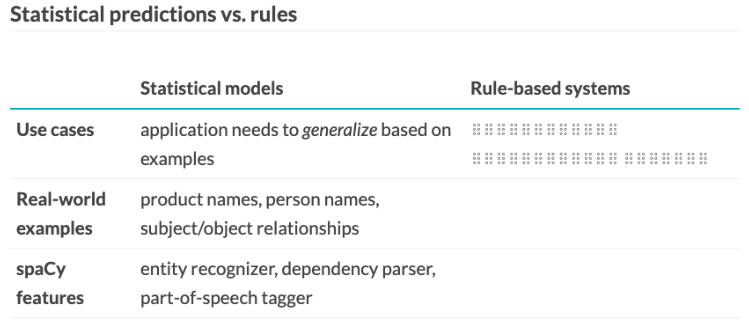

In [109]:
Image("ss2.11.1.png")

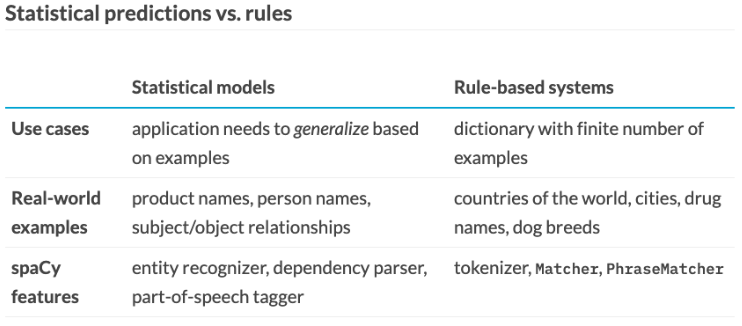

In [110]:
Image("ss2.11.2.png")

Recap: Rule-based Matching

In [86]:
# Initialize with the shared vocab
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{"LEMMA": "love", "POS": "VERB"}, {"LOWER": "cats"}]
matcher.add("LOVE_CATS", None, pattern)

# Operators can specify how often a token should be matched
pattern = [{"TEXT": "very", "OP": "+"}, {"TEXT": "happy"}]
matcher.add("VERY_HAPPY", None, pattern)

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)

Adding statistical predictions

In [87]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", None, [{"LOWER": "golden"}, {"LOWER": "retriever"}])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


Efficient phrase matching (1)

- PhraseMatcher like regular expressions or keyword search – but with access to the tokens!
- Takes Doc object as patterns
- More efficient and faster than the Matcher
- Great for matching large word lists

Efficient phrase matching (2)

In [88]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", None, pattern)
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: Golden Retriever


In [90]:
# ?

matcher(doc)

[(2951553348639939143, 3, 5)]

In [92]:
# ?

for match_id, start, end in matcher(doc):
    print(match_id)

2951553348639939143


In [93]:
# ?

for match_id, start, end in matcher(doc):
    print(end)

5


12. Debugging patterns (1) (Quiz)

Why does this pattern not match the tokens “Silicon Valley” in the doc?

In [94]:
pattern = [{'LOWER': 'silicon'}, {'TEXT': ' '}, {'LOWER': 'valley'}]
doc = nlp("Can Silicon Valley workers rein in big tech from within?")

 - The tokenizer doesn’t create tokens for single spaces, so there’s no token with the value " " in between.
 
 That's correct! The tokenizer already takes care of splitting off whitespace and each dictionary in the pattern describes one token.

13. Debugging patterns (2)

Both patterns in this exercise contain mistakes and won’t match as expected. Can you fix them? If you get stuck, try printing the tokens in the doc to see how the text will be split and adjust the pattern so that each dictionary represents one token.

- Edit pattern1 so that it correctly matches all case-insensitive mentions of "Amazon" plus a title-cased proper noun.
- Edit pattern2 so that it correctly matches all case-insensitive mentions of "ad-free", plus the following noun.

In [98]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_md")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
# pattern1 = [{"LOWER": "Amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
# pattern2 = [{"LOWER": "ad-free"}, {"POS": "NOUN"}]

pattern1 = [{"LOWER": "amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"}, {"TEXT": "-"}, {"LOWER": "free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", None, pattern1)
matcher.add("PATTERN2", None, pattern2)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


✔ Well done! For the token '-', you can match on the attribute 'TEXT',
'LOWER' or even 'SHAPE'. All of those are correct. As you can see, paying close
attention to the tokenization is very important when working with the
token-based 'Matcher'. Sometimes it's much easier to just match exact strings
instead and use the 'PhraseMatcher', which we'll get to in the next
exercise.

14. Efficient phrase matching

Sometimes it’s more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world. We already have a list of countries, so let’s use this as the basis of our information extraction script. A list of string names is available as the variable *COUNTRIES*.

- Import the **PhraseMatcher** and initialize it with the shared **vocab** as the variable **matcher**.
- Add the phrase patterns and call the matcher on the **doc**.

In [104]:
import json
from spacy.lang.en import English


# https://github.com/ines/spacy-course/tree/master/exercises/en
with open("countries.json") as f:
    COUNTRIES = json.loads(f.read())

nlp = English()
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", None, *patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Czech Republic, Slovakia]


15. Extracting countries and relationships

In the previous exercise, you wrote a script using spaCy’s PhraseMatcher to find country names in text. Let’s use that country matcher on a longer text, analyze the syntax and update the document’s entities with the matched countries.

- Iterate over the matches and create a Span with the label "GPE" (geopolitical entity).
- Overwrite the entities in doc.ents and add the matched span.
- Get the matched span’s root head token.
- Print the text of the head token and the span.

In [108]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

with open("countries.json") as f:
    COUNTRIES = json.loads(f.read())
with open("country_text.txt") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_md")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", None, *patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label='GPE')

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

in --> Namibia
in --> South Africa
Africa --> Cambodia
of --> Kuwait
as --> Somalia
Somalia --> Haiti
Haiti --> Mozambique
in --> Somalia
for --> Rwanda
Britain --> Singapore
War --> Sierra Leone
of --> Afghanistan
invaded --> Iraq
in --> Sudan
of --> Congo
earthquake --> Haiti
[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('Cambodia', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Mozambique', 'GPE'), ('Somalia', 'GPE'), ('Rwanda', 'GPE'), ('Singapore', 'GPE'), ('Sierra Leone', 'GPE'), ('Afghanistan', 'GPE'), ('Iraq', 'GPE'), ('Sudan', 'GPE'), ('Congo', 'GPE'), ('Haiti', 'GPE')]


✔ Well done! Now that you've practiced combining predictions with
rule-based information extraction, you're ready for chapter 3, which will teach
you everything about spaCy's processing pipelines.